<a href="https://colab.research.google.com/github/PhD-Gabriel-Caballero/RESSBIO/blob/S2-meteodata-NASA/S2_water_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install the required libraries**

In [1]:
!pip install -U geemap
!pip install earthengine-api
!pip install PyShp
!pip install PyCRS
!pip install geopandas
!pip install pygal
!pip install ipygee
!pip install mss
#geemap.update_package()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.1 MB/s eta 0:00:00
  Attempting uninstall: geemap
    Found existing installation: geemap 0.26.0
    Uninstalling geemap-0.26.0:
      Successfully uninstalled geemap-0.26.0
  Preparing metadata (setup.py) ... done
  Created wheel for PyCRS: filename=PyCRS-1.0.2-py3-none-any.whl size=32688 sha256=090b31a8462b4ceb878b8a413e5866aae94dc576a78c160345267c18eb1877ba
  Stored in directory: /root/.cache/pip/wheels/47/1d/70/7a5bdf33347e7c75e95b06b1fa38f076a59a9506653cc24aff
Successfully built PyCRS
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ipygee: filename=ipygee-0.0.18-py3-none-any.whl size=41203 sha256=c39fbd5dd1e83a3bc5bd9c36219d1af9388fc

**Import libraries**

In [2]:
import ee
import geemap
import geemap.colormaps as cm

from ipyleaflet import *
from ipywidgets import Label
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import time
import math

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import scipy.io
import os
import pickle
import datetime
import array

import pycrs
import shapely
import shapefile as shp
from shapely.geometry import mapping
from shapely.geometry import box

import pygal
import ipygee as ui
from ipygee import *
from ipygee import chart
import csv
import yaml
import requests, csv

**Mount GitHub repository**

In [146]:
!rm -r RESSBIO # delete the complete repository folder
!git clone https://github.com/Grcf2585/RESSBIO # clone repository folder
sys.path.insert(0,'/content/RESSBIO')

Cloning into 'RESSBIO'...
remote: Enumerating objects: 322, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 322 (delta 45), reused 28 (delta 28), pack-reused 262
Receiving objects: 100% (322/322), 33.50 MiB | 17.41 MiB/s, done.
Resolving deltas: 100% (175/175), done.


In [15]:
!rm -r nasa-power-api # delete the complete repository folder
!git clone https://github.com/kdmayer/nasa-power-api # clone repository folder
sys.path.insert(0,'/content/nasa-power-api')

rm: cannot remove 'nasa-power-api': No such file or directory
Cloning into 'nasa-power-api'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 33 (delta 12), reused 15 (delta 3), pack-reused 0
Receiving objects: 100% (33/33), 7.52 KiB | 7.52 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [16]:
!git clone https://github.com/ataha/python-snippets.git

Cloning into 'python-snippets'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 59 (delta 28), reused 8 (delta 2), pack-reused 0
Receiving objects: 100% (59/59), 14.31 KiB | 14.31 MiB/s, done.
Resolving deltas: 100% (28/28), done.


**Mount Google Drive**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Authenticate and initialize ee**

In [5]:
try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=At6-oDv8YN9-VQnvy51UWy6S4Lq-R3grkIhwaVmFdIM&tc=oSk4SRfv_QV4mdqJHUJbsqQ42n5y6SYejeVx8I5Pzg8&cc=oIyKwa7TuUflKlgyRy1rlqvCJ5NjkPxTYXDMTXsmGfA

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AfJohXnCIrK-1RuMolisQ3glwfSJhheOy5g62fT83qLS2W5Gme4N0qHwfKo

Successfully saved authorization token.


**Select the Area of Interest**

In [6]:
Map = geemap.Map(toolbar_ctrl=True, layer_ctrl=True)
Map.default_style = {'cursor': 'crosshair'}
Map.add_basemap('SATELLITE')

# Center the map in the desired country
country = 'Spain'
country_bounds = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017").filterMetadata('country_na', 'equals', country);
Map.centerObject(country_bounds,8)
Map

Map(center=[40.35722509547827, -3.499564837147696], controls=(WidgetControl(options=['position', 'transparent_…

**Retrieve the ROI from the map**

In [7]:
roi_N = geemap.shp_to_ee('/content/RESSBIO/ROIs Albufera/N_Polygon.shp')
Map.addLayer(roi_N, {},'Albufera ROI_N',True)

roi_S = geemap.shp_to_ee('/content/RESSBIO/ROIs Albufera/S_Polygon.shp')
Map.addLayer(roi_S, {},'Albufera ROI_S',True)

roi_NW = geemap.shp_to_ee('/content/RESSBIO/ROIs Albufera/NW_Polygon.shp')
Map.addLayer(roi_NW, {},'Albufera ROI_NW',True)

roi_SW = geemap.shp_to_ee('/content/RESSBIO/ROIs Albufera/SW_Polygon.shp')
Map.addLayer(roi_SW, {},'Albufera ROI_SW',True)

roi_W = geemap.shp_to_ee('/content/RESSBIO/ROIs Albufera/W_Polygon.shp')
Map.addLayer(roi_W, {},'Albufera ROI_W',True)

roi_Albufera = geemap.shp_to_ee('/content/RESSBIO/ROIs Albufera/Albufera curvas.shp')
Map.addLayer(roi_Albufera, {},'Albufera ROI',True)


In [8]:
feature = Map.draw_last_feature
roi_show_map = feature.geometry()
point_coordinates = roi_show_map.coordinates().getInfo()
point_long = point_coordinates[0]
point_lat = point_coordinates[1]

**Model import**

In [253]:
#!cp /content/RESSBIO/Models/GEE_GPR_4KCV_CHL_model.py .
!cp /content/RESSBIO/Models/GEE_GPR_4KCV_PC_model.py .
!cp /content/RESSBIO/Models/GEE_GPR_4KCV_SDD_model.py .
!cp /content/RESSBIO/Models/GEE_GPR_7B_CHL_model.py .
#!cp /content/RESSBIO/Models/Chla_Hydrolight_GPR_MLRA_10KF_CV_7B_model_20231003.py .
!cp /content/RESSBIO/Models/Chla_Hydrolight_GPR_MLRA_70train_model_20230705.py .
!cp /content/RESSBIO/Models/Chla_Hydrolight_GPR_MLRA_4KF_CV_7B_20Gaussian_noise_model_20231003.py .
!cp /content/RESSBIO/Models/GEE_GPR_4KCV_CHL_model.py .

#import Chla_Hydrolight_GPR_MLRA_10KF_CV_7B_model_20231003
import Chla_Hydrolight_GPR_MLRA_70train_model_20230705
import Chla_Hydrolight_GPR_MLRA_4KF_CV_7B_20Gaussian_noise_model_20231003
import GEE_GPR_4KCV_CHL_model
import GEE_GPR_4KCV_PC_model
import GEE_GPR_4KCV_SDD_model

# import GEE_GPR_7B_CHL_model

In [17]:
!cp /content//nasa-power-api/src/power_api.py .
!cp /content//nasa-power-api/main.py .

import power_api
from power_api import PowerAPI
import main

In [13]:
# !python /content/python-snippets/YAML_modifier/YAML_Modifier.py config.yaml lat="39" lon="-0.38" output_dir=/content/RESSBIO start_date=2022063 end_date=20230701

In [13]:
# In-situ data loading
Albufera_insitu_data = scipy.io.loadmat('/content/RESSBIO/In situ data/Centro_Insitu_Albufera_2016_2023.mat',squeeze_me=True)
X_insitu = np.array(Albufera_insitu_data['Insitu_date'])
X_insitu = pd.to_datetime(X_insitu-719529, unit='D')
Chl_insitu = Albufera_insitu_data['Chlorophyll']
Secchi_insitu = Albufera_insitu_data['Secchi']

**Functions**

In [18]:
def write_yaml_to_file(py_obj,filename):
    with open(f'{filename}.yaml', 'w',) as f :
        yaml.dump(py_obj,f,sort_keys=False)
    print('Written to file successfully')

In [19]:
# Auxiliar function for mapping : (1..n) -> (B1..Bn)
def band_names(element):
  bandName = ee.String('B').cat(ee.Number(element).int().format())
  return bandName

def addDoy(image):
  doy = image.date().getRelative('day', 'year')
  doyBand = ee.Image.constant(doy).uint16().rename('doy')
  return image.addBands(doyBand)

In [20]:
# Water variable GPR for mean prediction
def water_var_GPR(image_orig):

  # Create List of Bands of Dimension n (Xtrain[n,n])
  XTrain_dim = currentModel['X_train'].length().get([0]).getInfo();

  band_sequence   = (ee.List.sequence(1, XTrain_dim)
                    .map(band_names));

  # Create a list of band names for flattening operation
  im_norm_ell2D_hypell = image_orig.subtract(ee.Image(currentModel['mx'])).divide(ee.Image(currentModel['sx'])).multiply(ee.Image(currentModel['hyp_ell'])).toArray().toArray(1);

  im_norm_ell2D = image_orig.subtract(ee.Image(currentModel['mx'])).divide(ee.Image(currentModel['sx'])).toArray().toArray(1);

  PtTPt  = im_norm_ell2D_hypell.matrixTranspose().matrixMultiply(im_norm_ell2D).arrayProject([0]).multiply(-0.5);

  PtTDX  = ee.Image(currentModel['X_train']).matrixMultiply(im_norm_ell2D_hypell).arrayProject([0]).arrayFlatten([band_sequence]);

  arg1   = PtTPt.exp().multiply(currentModel['hyp_sig']);

  k_star = PtTDX.subtract(ee.Image(currentModel['XDX_pre_calc']).multiply(0.5)).exp().toArray();

  mean_pred = k_star.arrayDotProduct(ee.Image(currentModel['alpha_coefficients']).toArray()).multiply(arg1);

  mean_pred = mean_pred.toArray(1).arrayProject([0]).arrayFlatten([[currentModel['veg_index']]]);

  mean_pred = mean_pred.add(currentModel['mean_model']);

  # Mask values equal or less than 0
  mean_pred = mean_pred.updateMask(mean_pred.gt(0))

  image_orig = image_orig.addBands(mean_pred)

  return image_orig.select(currentModel['veg_index'])

In [21]:
def mask_gt(image):
  veg_index_mask = image.select(currentModel['veg_index']).gt(0).rename('veg_index_mask')
  return image.addBands(veg_index_mask).select('veg_index_mask')

def addVariables(image):
  date = ee.Date(image.get("system:time_start"))
  years = date.difference(ee.Date('1970-01-01'),'days')
  return image.addBands(ee.Image(years).rename('t').float())

In [22]:
def extract_ts(roi, col, band):
    """ Constructs a dataframe with the time series for the ROI with the image
        collection.

        Parameters
        ----------
        roi : ee.Geometry, Region of interest

        col : ee.ImageCollection

        band : string, Name of the band to retrieve

        Returns
        ------
        A pandas dataframe

    """

    # Auxiliar function to replace the null values with custom value(-9999)
    # so we do not lose the masked values.
    def set_NAN(key,val):
        return ee.List([val, -9999]).reduce(ee.Reducer.firstNonNull())

    # Retrieve the mean value of the band in the roi and the date of the image
    def get_ts(image):
        stat = image.select([band]).reduceRegion(
            reducer = ee.Reducer.mean(),
            geometry= roi,
            scale= 20,
            bestEffort= True
        )
        stat = stat.map(set_NAN)
        return ee.Feature(roi, stat).set({'millis': image.date().millis()})

    # List of features containing the reduced value and the date
    ts = col.map(get_ts)

    # Lists of values and dates
    y = ts.aggregate_array(band).getInfo()
    dates_ms = ts.aggregate_array('millis').getInfo() # Date in ms
    x = [datetime.fromtimestamp(d//1000.0) for d in dates_ms] # Formatted date

    # Dictionary that will feed the pandas dataframe
    dict = {'date': x, band: y}
    # Contruct the df and replace the custom NaN values(-9999) with np.nan
    df = pd.DataFrame(dict).replace(-9999, np.nan)
    return df

In [23]:
# Masking function for water and cloud
def maskS2cloud_and_water(image):
  not_water = image.select('SCL').neq(6);
  not_cloud_low = image.select('SCL').neq(7);
  not_cloud_medium = image.select('SCL').neq(8);
  not_cloud_high = image.select('SCL').neq(9);
  not_cirrus = image.select('SCL').neq(10);

  qa = image.select('QA60');
  cloudBitMask = 1 << 10;
  cirrusBitMask = 1 << 11;
  mask = (qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0)).And(not_water).And(not_cloud_low)
          .And(not_cloud_medium).And(not_cloud_high).And(not_cirrus))
  return image.updateMask(mask).divide(10000).copyProperties(qa).set('system:time_start', qa.get('system:time_start'))

In [24]:
#Function to mask clouds using the Sentinel-2 QA band

def maskS2clouds(image):
    qa = image.select('QA60');
    #Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10;
    cirrusBitMask = 1 << 11;

    #Both flags should be set to zero, indicating clear conditions.
    #mask = qa.bitwiseAnd(cloudBitMask).eq(0)and(qa.bitwiseAnd(cirrusBitMask).eq(0));
    mask = qa.bitwiseAnd(cloudBitMask).eq(0) and (qa.bitwiseAnd(cirrusBitMask).eq(0));

    return image.updateMask(mask).divide(10000).copyProperties(image).set("system:time_start", image.get("system:time_start"));

In [25]:
# Function to calculate and add Phycocyanin band
#ficocianina_S2 = #e^2.6151*(R740/R665)+3.6369;
#R740 nm = B6
#R665 nm = B4

def addFICOS2(image):
    fico = (((image.select('B6').divide(image.select('B4')).multiply(2.6151)).add(3.6369))).exp().rename('fico')

    return image.addBands(fico)

In [26]:
# Function to calculate and add Chlorophyll band
#TBDO = R740*(1/R665 - 1/R705)
#clorofila_S2 = 104.1*(TBDO^2) + 221.1*TBDO + 2
#R665 = B4
#R705 = B5
#R740 = B6

def addCHLROS2(image):
    tbdo = (image.select('B6').divide(image.select('B4'))).subtract(image.select('B6').divide(image.select('B5')))
    chlro =  ((tbdo.multiply(tbdo).multiply(104.1).add(tbdo.multiply(221.1))).add(2)).rename('chlro')

    return image.addBands(chlro)

In [27]:
# Function to calculate and add Secchi band
#profundidad_Secchi_S2 =  0.224*(R560/R704)+0.0836
#R560 nm = B3
#R704 nm = B5

def addSECCHIS2(image):
    Secchi = ((image.select('B3').divide(image.select('B5')).multiply(0.224)).add(0.0836)).rename('Secchi')
    return image.addBands(Secchi)

In [28]:
# Clipping image collection by Albufera geometry
def clipcol(image):
    #clipimage = image.clip(roi_show_map)
    clipimage = image.clip(roi_Albufera)
    return clipimage

# Add NDWI band to image collection
def addNDWI(image):
    return image.addBands(image.normalizedDifference(['B3', 'B5']).rename('NDWI'));

# Function to mask out NDWI
def S2maskedWater(image):
    NDWI = image.select(['NDWI']);
    return image.addBands(ee.Image(1).updateMask(NDWI.gte(-0.3)).rename('NDWI_mask')); #lte

# Function to mask out Phycocyanin values greater than 3000
def S2maskPC(image):
    PC = image.select(['fico']);
    return image.updateMask(PC.lte(3000)); #lte

def maskBands(image):
  return image.select(['B2', 'B3', 'B4', 'B5', 'B6', 'B7','B8A','NDWI']).updateMask(image.select('NDWI_mask'));


In [29]:
# Define a function to filter the SR and s2cloudless collections according to the area of interest and date parameters, then join them on the system: index property. The result is a copy of the SR
# collection where each image has a new 's2cloudless' property whose value is the corresponding s2cloudless image.

def get_s2_sr_cld_col(aoi, start_date, end_date):
    # Import and filter S2 SR.
    S2_SR_collection = (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
        .filterBounds(aoi)
        .filterDate(start_date, end_date)
        .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', CLOUD_FILTER)))

    # Import and filter s2cloudless.
    S2_cloudless_collection = (ee.ImageCollection('COPERNICUS/S2_CLOUD_PROBABILITY')
        .filterBounds(aoi)
        .filterDate(start_date, end_date))

    # Join the filtered s2cloudless collection to the SR collection by the 'system:index' property.
    return ee.ImageCollection(ee.Join.saveFirst('s2cloudless').apply(**{
        'primary': S2_SR_collection,
        'secondary':  S2_cloudless_collection,
        'condition': ee.Filter.equals(**{
            'leftField': 'system:index',
            'rightField': 'system:index'
        })
    }))

In [30]:
# Define a function to assemble all of the cloud and cloud shadow components and produce the final mask.

def add_cld_shdw_mask(img):
    # Add cloud component bands.
    img_cloud = add_cloud_bands(img)

    # Add cloud shadow component bands.
    img_cloud_shadow = add_shadow_bands(img_cloud)

    # Combine cloud and shadow mask, set cloud and shadow as value 1, else 0.
    is_cld_shdw = img_cloud_shadow.select('clouds').add(img_cloud_shadow.select('shadows')).gt(0)

    # Remove small cloud-shadow patches and dilate remaining pixels by BUFFER input.
    # 20 m scale is for speed, and assumes clouds don't require 10 m precision.
    is_cld_shdw = (is_cld_shdw.focalMin(2).focalMax(BUFFER*2/20)
        .reproject(**{'crs': img.select([0]).projection(), 'scale': 20})
        .rename('cloudmask'))

    # Add the final cloud-shadow mask to the image.
    return img_cloud_shadow.addBands(is_cld_shdw).divide(10000).copyProperties(img).set("system:time_start", img.get("system:time_start"));
    #return img_cloud_shadow.addBands(is_cld_shdw)

In [31]:
# Define a function to apply the cloud mask to each image in the collection.

def apply_cld_shdw_mask(img):
    # Subset the cloudmask band and invert it so clouds/shadow are 0, else 1.
    not_cld_shdw = img.select('cloudmask').Not()

    # Subset reflectance bands and update their masks, return the result.
    return img.select('B.*').updateMask(not_cld_shdw)

In [32]:
# Define a function to add the s2cloudless probability layer and derived cloud mask as bands to an S2 SR image input.
def add_cloud_bands(img):
    # Get s2cloudless image, subset the probability band.
    cld_prb = ee.Image(img.get('s2cloudless')).select('probability')

    # Condition s2cloudless by the probability threshold value.
    is_cloud = cld_prb.gt(CLD_PRB_THRESH).rename('clouds')

    # Add the cloud probability layer and cloud mask as image bands.
    return img.addBands(ee.Image([cld_prb, is_cloud]))

In [33]:
# Define a function to add dark pixels, cloud projection, and identified shadows as bands to an S2 SR image input. Note that the image input needs to be the result of
# the above add_cloud_bands function because it relies on knowing which pixels are considered cloudy ('clouds' band).

def add_shadow_bands(img):
    # Identify water pixels from the SCL band.
    not_water = img.select('SCL').neq(6)

    # Identify dark NIR pixels that are not water (potential cloud shadow pixels).
    SR_BAND_SCALE = 1e4
    dark_pixels = img.select('B8').lt(NIR_DRK_THRESH*SR_BAND_SCALE).multiply(not_water).rename('dark_pixels')

    # Determine the direction to project cloud shadow from clouds (assumes UTM projection).
    shadow_azimuth = ee.Number(90).subtract(ee.Number(img.get('MEAN_SOLAR_AZIMUTH_ANGLE')));

    # Project shadows from clouds for the distance specified by the CLD_PRJ_DIST input.
    cld_proj = (img.select('clouds').directionalDistanceTransform(shadow_azimuth, CLD_PRJ_DIST*10)
        .reproject(**{'crs': img.select(0).projection(), 'scale': 100})
        .select('distance')
        .mask()
        .rename('cloud_transform'))

    # Identify the intersection of dark pixels with cloud shadow projection.
    shadows = cld_proj.multiply(dark_pixels).rename('shadows')

    # Add dark pixels, cloud projection, and identified shadows as image bands.
    return img.addBands(ee.Image([dark_pixels, cld_proj, shadows]))

Dates of interest and acquisitions configuration parameters

In [297]:
# Configuration Parameters
start_date = '2019-12-13'
end_date = '2023-09-11'
S2_CPP = 5 # CLOUDY_PIXEL_PERCENTAGE
tile_name = "30SYJ"
#roi = roi_show_map
roi = roi_W.geometry() # Select the current region of interest, the options are: roi_N, roi_S, roi_W, roi_SW, and roi_NW.
geometry = roi_Albufera # The Albufera mask is copied as geometry to filter the image collection posteriorly.
#geometry = roi_N

CLOUD_FILTER = 60
CLD_PRB_THRESH = 50
NIR_DRK_THRESH = 0.25
CLD_PRJ_DIST = 1
BUFFER = 50

Create the initial image collection with the spectral bands

In [299]:
# Add cloud and cloud shadow component bands to each image and then apply the mask to each image. Reduce the collection by median (in your application,
# you might consider using medoid reduction to build a composite from actual data values, instead of per-band statistics).

print('SENTINEL-2 time series being retrieved')
S2_joint_collection = get_s2_sr_cld_col(roi, start_date, end_date)

S2_cloud_shadow_free_collection = (S2_joint_collection.map(add_cld_shdw_mask).map(apply_cld_shdw_mask))

SENTINEL-2 time series being retrieved


In [300]:
S2collection_raw = S2_cloud_shadow_free_collection\
                   .map(clipcol)\
                   .filterMetadata('MGRS_TILE', 'equals', tile_name)\
                   .select(['B2', 'B3', 'B4', 'B5', 'B6', 'B7','B8A'])\

S2collection_RGB = S2_cloud_shadow_free_collection\
                   .filterMetadata('MGRS_TILE', 'equals', tile_name)\
                   .select(['B2', 'B3', 'B4', 'B5', 'B6', 'B7','B8A'])\


# Apply water masking functions to the image collection
S2collection_aux = S2collection_raw.map(addNDWI).map(S2maskedWater).map(maskBands);
S2collection_ini = S2collection_aux.select(['B2', 'B3', 'B4', 'B5', 'B6', 'B7','B8A']);

Meteorological data from NASA POWER processing

In [287]:
data = {
    'lat':point_lat,
    'lon':point_long,
    'start_date':start_date,
    'end_date':end_date,
    'temporal':'hourly',
    'output_dir':'/content/RESSBIO'

}
config = yaml.dump(data, sort_keys=False)
write_yaml_to_file(data, 'config')

Written to file successfully


In [38]:
!python /content/nasa-power-api/main.py

Define cloud mask component functions

Cloud shadow components

Final cloud-shadow mask

Define cloud mask application function

Process the collection

S2 dates extraction

In [301]:
# Creating labels - Multitemporal plotting
labels_S2 = S2collection_ini.aggregate_array("system:index").getInfo()

# Dates S2
Dates_S2 = []
for i in labels_S2:
    Dates_S2.append(datetime.datetime.strptime(i.split('_')[0].split('T')[0], '%Y%m%d').date())
Dates_S2.sort()

#datetime.datetime.strptime(date, "%Y-%m-%d")
#https://stackoverflow.com/questions/19480028/attributeerror-datetime-module-has-no-attribute-strptime

Creating the retrieved image collection by applying Gaussian Process Regression

In [302]:
#GPR retrieval model configuration (Chlorophyll)

limit=2048;
sys.setrecursionlimit(limit) #Set the maximum depth of the Python interpreter stack to limit.
# This limit prevents infinite recursion from causing an overflow of the C stack and crashing Python.

currentwatervariable = 'Chl'
currentModel = GEE_GPR_4KCV_CHL_model.models[currentwatervariable] # Model based on in-situ data
#currentModel = Chla_Hydrolight_GPR_MLRA_4KF_CV_7B_20Gaussian_noise_model_20231003.models[currentwatervariable] # Model based on simulated data (Hydrolight)
S2_GPR_CHL_collection =  S2collection_ini.map(water_var_GPR).select(currentModel['veg_index'])
del currentwatervariable
del currentModel

#GPR retrieval model configuration (Phycocyanin)
currentwatervariable ='PC'
currentModel = GEE_GPR_4KCV_PC_model.models[currentwatervariable]
S2_GPR_PC_collection =  S2collection_ini.map(water_var_GPR).select(currentModel['veg_index'])
del currentwatervariable
del currentModel

#GPR retrieval model configuration (Secchi Disc Depth)
currentwatervariable ='ZSD'
currentModel = GEE_GPR_4KCV_SDD_model.models[currentwatervariable]
S2_GPR_SDD_collection =  S2collection_ini.map(water_var_GPR).select(currentModel['veg_index'])
del currentwatervariable
del currentModel

Creating the retrieved image collection by applying parametric indices

In [303]:
# Add the Chlorophyll band to the image collection
S2_PI_CHL_collection = S2collection_ini.map(addCHLROS2).select('chlro')

# Add Phycocyanin band to the image collection
S2_PI_PC_collection = S2collection_ini.map(addFICOS2).map(S2maskPC).select('fico')

# Add Secchi Disc Band band to the image collection
S2_PI_SDD_collection = S2collection_ini.map(addSECCHIS2).select('Secchi')

S2 image collection to a numpy array conversion

In [304]:
# GPR image collections conversion

S2_GPR_CHL_image = S2_GPR_CHL_collection.toBands().unmask(0);
S2_GPR_CHL_image_nparray = geemap.ee_to_numpy(ee_object = S2_GPR_CHL_image.toArray(), region=roi, default_value=None)

S2_GPR_PC_image = S2_GPR_PC_collection.toBands().unmask(0);
S2_GPR_PC_image_nparray = geemap.ee_to_numpy(ee_object = S2_GPR_PC_image.toArray(), region=roi, default_value=None)

S2_GPR_SDD_image = S2_GPR_SDD_collection.toBands().unmask(0);
S2_GPR_SDD_image_nparray = geemap.ee_to_numpy(ee_object = S2_GPR_SDD_image.toArray(), region=roi, default_value=None)

# PI image collections conversion

S2_PI_CHL_image = S2_PI_CHL_collection.toBands().unmask(0);
S2_PI_CHL_image_nparray = geemap.ee_to_numpy(ee_object = S2_PI_CHL_image.toArray(), region=roi, default_value=None)

S2_PI_PC_image = S2_PI_PC_collection.toBands().unmask(0);
S2_PI_PC_image_nparray = geemap.ee_to_numpy(ee_object = S2_PI_PC_image.toArray(), region=roi, default_value=None)

S2_PI_SDD_image = S2_PI_SDD_collection.toBands().unmask(0);
S2_PI_SDD_image_nparray = geemap.ee_to_numpy(ee_object = S2_PI_SDD_image.toArray(), region=roi, default_value=None)

print('S2 ROI Dimension')
print(S2_GPR_CHL_image_nparray.shape)

S2 ROI Dimension
(41, 41, 189)


In [305]:
# GPR numpy array images parcel mean calculations

S2_GPR_CHL_parcel_mean = S2_GPR_CHL_image_nparray.mean(axis=1).mean(axis=0)
S2_GPR_CHL_parcel_std = np.std(S2_GPR_CHL_parcel_mean, axis=0)

S2_GPR_PC_parcel_mean = S2_GPR_PC_image_nparray.mean(axis=1).mean(axis=0)
S2_GPR_PC_parcel_std = np.std(S2_GPR_PC_parcel_mean, axis=0)

S2_GPR_SDD_parcel_mean = S2_GPR_SDD_image_nparray.mean(axis=1).mean(axis=0)
S2_GPR_SDD_parcel_std = np.std(S2_GPR_SDD_parcel_mean, axis=0)

# PI numpy array images parcel mean calculations

S2_PI_CHL_parcel_mean = S2_PI_CHL_image_nparray.mean(axis=1).mean(axis=0)
S2_PI_CHL_parcel_std = np.std(S2_PI_CHL_parcel_mean, axis=0)

S2_PI_PC_parcel_mean = S2_PI_PC_image_nparray.mean(axis=1).mean(axis=0)
S2_PI_PC_parcel_std = np.std(S2_PI_PC_parcel_mean, axis=0)

S2_PI_SDD_parcel_mean = S2_PI_SDD_image_nparray.mean(axis=1).mean(axis=0)
S2_PI_SDD_parcel_std = np.std(S2_PI_SDD_parcel_mean, axis=0)

#Replacing zero values whit "nan"

CHL_threshold_mean = (S2_GPR_CHL_image_nparray.mean(axis=1).mean(axis=0)).mean(axis=0)
CHL_SD_threshold = np.std(S2_GPR_CHL_image_nparray.mean(axis=1).mean(axis=0), axis=0)
CHL_threshold = CHL_threshold_mean-1*CHL_SD_threshold

PC_threshold_mean = (S2_GPR_PC_image_nparray.mean(axis=1).mean(axis=0)).mean(axis=0)
PC_SD_threshold = np.std(S2_GPR_PC_image_nparray.mean(axis=1).mean(axis=0), axis=0)
PC_threshold = PC_threshold_mean-1*PC_SD_threshold

SDD_threshold_mean = (S2_GPR_SDD_image_nparray.mean(axis=1).mean(axis=0)).mean(axis=0)
SDD_SD_threshold = np.std(S2_GPR_SDD_image_nparray.mean(axis=1).mean(axis=0), axis=0)
SDD_threshold = SDD_threshold_mean-1*SDD_SD_threshold

S2_GPR_CHL_parcel_mean = S2_GPR_CHL_parcel_mean.astype('float')
S2_GPR_CHL_parcel_mean[S2_GPR_CHL_parcel_mean < CHL_threshold] = np.nan
#S2_GPR_CHL_parcel_mean[S2_GPR_CHL_parcel_mean==0] = np.nan

S2_PI_CHL_parcel_mean = S2_PI_CHL_parcel_mean.astype('float')
S2_PI_CHL_parcel_mean[S2_PI_CHL_parcel_mean < CHL_threshold] = np.nan
#S2_PI_CHL_parcel_mean[S2_PI_CHL_parcel_mean==0] = np.nan

S2_GPR_PC_parcel_mean = S2_GPR_PC_parcel_mean.astype('float')
S2_GPR_PC_parcel_mean[S2_GPR_PC_parcel_mean < PC_threshold] = np.nan

S2_PI_PC_parcel_mean = S2_PI_PC_parcel_mean.astype('float')
S2_PI_PC_parcel_mean[S2_PI_PC_parcel_mean < PC_threshold] = np.nan

S2_GPR_SDD_parcel_mean = S2_GPR_SDD_parcel_mean.astype('float')
S2_GPR_SDD_parcel_mean[S2_GPR_SDD_parcel_mean < SDD_threshold] = np.nan

S2_PI_SDD_parcel_mean = S2_PI_SDD_parcel_mean.astype('float')
S2_PI_SDD_parcel_mean[S2_PI_SDD_parcel_mean < SDD_threshold] = np.nan


In [306]:
# Making sequences for interp
ok = ~np.isnan(S2_GPR_CHL_parcel_mean)
xp = ok.ravel().nonzero()[0]
fp = S2_GPR_CHL_parcel_mean[~np.isnan(S2_GPR_CHL_parcel_mean)]
x  = np.isnan(S2_GPR_CHL_parcel_mean).ravel().nonzero()[0]

# Replacing nan values
S2_GPR_CHL_parcel_mean[np.isnan(S2_GPR_CHL_parcel_mean)] = np.interp(x, xp, fp)

# Making sequences for interp
ok = ~np.isnan(S2_PI_CHL_parcel_mean)
xp = ok.ravel().nonzero()[0]
fp = S2_PI_CHL_parcel_mean[~np.isnan(S2_PI_CHL_parcel_mean)]
x  = np.isnan(S2_PI_CHL_parcel_mean).ravel().nonzero()[0]

# Replacing nan values
S2_PI_CHL_parcel_mean[np.isnan(S2_PI_CHL_parcel_mean)] = np.interp(x, xp, fp)

S2 time-series plotting

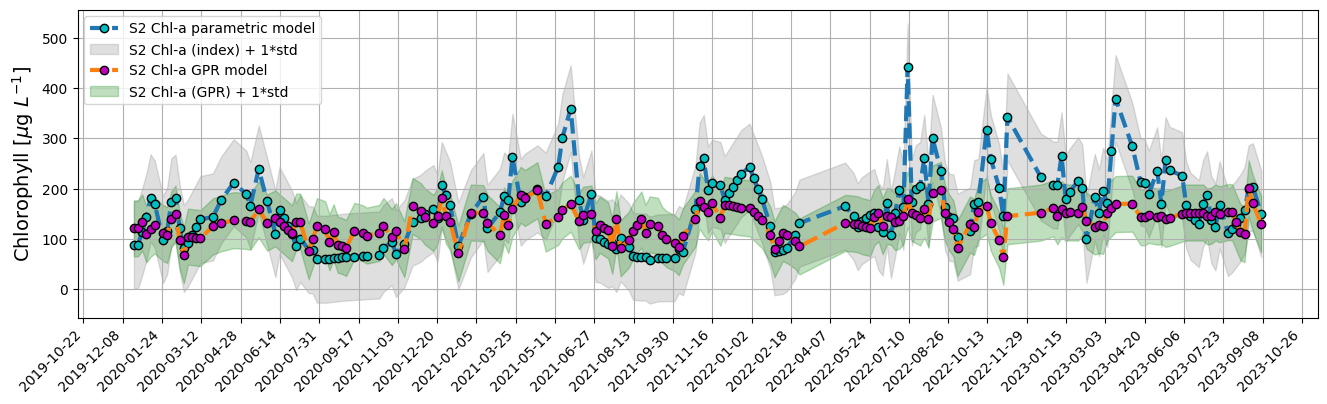

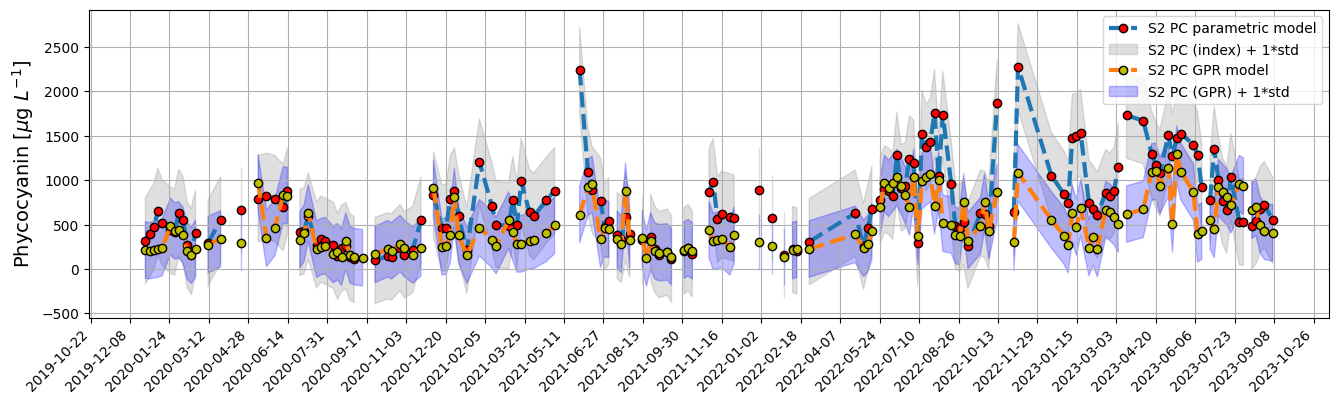

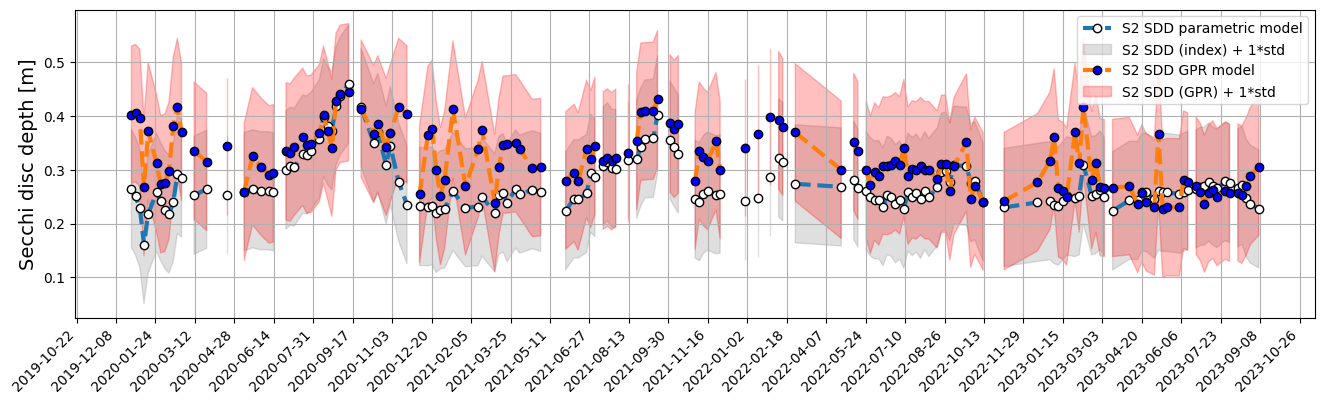

In [307]:
#Comparative Graphs

axmaxloc = S2_PI_CHL_image_nparray.shape[2]/4;
axminloc = S2_PI_CHL_image_nparray.shape[2]/4;

# Sentinel 2 Chlorophyll parametric index model vs GPR model time series plotting

plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.plot(Dates_S2,S2_PI_CHL_parcel_mean,linestyle="--",marker="o",markerfacecolor='c',markeredgecolor='k',markersize=6,lw=3,label='S2 Chl-a parametric model')
plt.fill_between(Dates_S2, S2_PI_CHL_parcel_mean-S2_PI_CHL_parcel_std,S2_PI_CHL_parcel_mean+S2_PI_CHL_parcel_std ,alpha=0.25,color='grey',label='S2 Chl-a (index) + 1*std')
plt.plot(Dates_S2,S2_GPR_CHL_parcel_mean,linestyle="--",marker="o",markerfacecolor='m',markeredgecolor='k',markersize=6,lw=3,label='S2 Chl-a GPR model')
plt.fill_between(Dates_S2, S2_GPR_CHL_parcel_mean-S2_GPR_CHL_parcel_std,S2_GPR_CHL_parcel_mean+S2_GPR_CHL_parcel_std ,alpha=0.25,color='green',label='S2 Chl-a (GPR) + 1*std')
#plt.title('S2 Chlorophyll ROI comparison')
plt.legend()
plt.grid(1)
plt.ylabel('Chlorophyll [$\mu$g $L^{-1}$]',fontsize='14')
plt.grid(1)
#plt.ylim(0,50)
plt.xticks(rotation=45, ha='right')
plt.show()

# Sentinel 2 Phycocyanin parametric index model vs GPR model time series plotting

plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.plot(Dates_S2,S2_PI_PC_parcel_mean,linestyle="--",marker="o",markerfacecolor='r',markeredgecolor='k',markersize=6,lw=3,label='S2 PC parametric model')
plt.fill_between(Dates_S2, S2_PI_PC_parcel_mean-S2_PI_PC_parcel_std,S2_PI_PC_parcel_mean+S2_PI_PC_parcel_std ,alpha=0.25,color='grey',label='S2 PC (index) + 1*std')
plt.plot(Dates_S2,S2_GPR_PC_parcel_mean,linestyle="--",marker="o",markerfacecolor='y',markeredgecolor='k',markersize=6,lw=3,label='S2 PC GPR model')
plt.fill_between(Dates_S2, S2_GPR_PC_parcel_mean-S2_GPR_PC_parcel_std,S2_GPR_PC_parcel_mean+S2_GPR_PC_parcel_std ,alpha=0.25,color='blue',label='S2 PC (GPR) + 1*std')
#plt.title('S2 Phycocyanin ROI comparison')
plt.legend()
plt.grid(1)
plt.ylabel('Phycocyanin [$\mu$g $L^{-1}$]',fontsize='14')
plt.grid(1)
plt.xticks(rotation=45, ha='right')
plt.show()

# Sentinel 2 Secchi Disk Depth parametric index model vs GPR model time series plotting

plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.plot(Dates_S2,S2_PI_SDD_parcel_mean,linestyle="--",marker="o",markerfacecolor='white',markeredgecolor='k',markersize=6,lw=3,label='S2 SDD parametric model')
plt.fill_between(Dates_S2, S2_PI_SDD_parcel_mean-S2_PI_SDD_parcel_std,S2_PI_SDD_parcel_mean+S2_PI_SDD_parcel_std ,alpha=0.25,color='grey',label='S2 SDD (index) + 1*std')
plt.plot(Dates_S2,S2_GPR_SDD_parcel_mean,linestyle="--",marker="o",markerfacecolor='blue',markeredgecolor='k',markersize=6,lw=3,label='S2 SDD GPR model')
plt.fill_between(Dates_S2, S2_GPR_SDD_parcel_mean-S2_GPR_SDD_parcel_std,S2_GPR_SDD_parcel_mean+S2_GPR_SDD_parcel_std ,alpha=0.25,color='red',label='S2 SDD (GPR) + 1*std')
#plt.title('S2 Secchi disc depth ROI comparison')
plt.legend()
plt.grid(1)
plt.ylabel('Secchi disc depth [m]',fontsize='14')
plt.grid(1)
plt.xticks(rotation=45, ha='right')
plt.show()

In [43]:
meteo_file_name =  '/content/RESSBIO/'+ str(point_long) +';'+ str(point_lat) + '.csv'
df = pd.read_csv(meteo_file_name, skipinitialspace=True,delimiter= ';')

meteo_date = df.iloc[:, 0]
meteo_precipitation = df.loc[:, 'PRECTOTCORR']
meteo_WS10m = df.loc[:, 'WS10M']

In [44]:
# Dates meteo
Dates_meteo = []
for i in meteo_date:
  Dates_meteo.append(datetime.datetime.strptime(str(i), '%Y%m%d'))
Dates_meteo.sort()

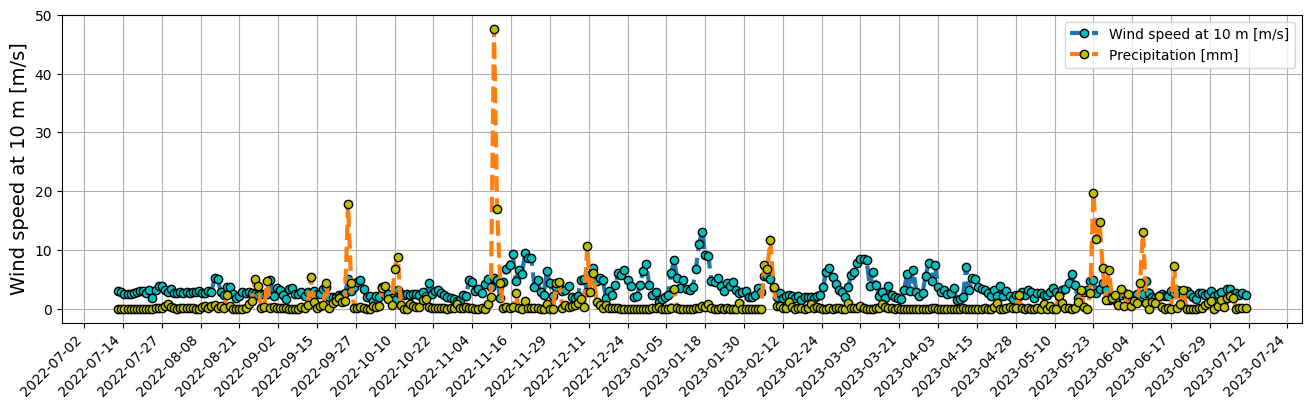

In [45]:
# Meteorological data from NASA POWER time series plotting

plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.plot(Dates_meteo,meteo_WS10m,linestyle="--",marker="o",markerfacecolor='c',markeredgecolor='k',markersize=6,lw=3,label='Wind speed at 10 m [m/s]')
plt.plot(Dates_meteo,meteo_precipitation,linestyle="--",marker="o",markerfacecolor='y',markeredgecolor='k',markersize=6,lw=3,label='Precipitation [mm]')
plt.legend()
plt.grid(1)
plt.ylabel('Wind speed at 10 m [m/s]',fontsize='14')
plt.grid(1)
plt.xticks(rotation=45, ha='right')
plt.show()

[NASA POWER satellite meteorological system is a good tool for obtaining estimates of the temperature-humidity index under Brazilian conditions compared to INMET weather stations data](https://link.springer.com/article/10.1007/s00484-023-02493-5)

In [48]:
# *Version: 2.0 Published: 2021/03/09* Source: [NASA POWER](https://power.larc.nasa.gov/)
# POWER API Multi-Point Download
# This is an overview of the process to request data from multiple data points from the POWER API.

import os, json, requests

locations = [(39.34, -0.35), (5, 10)]

output = r""
base_url = r"https://power.larc.nasa.gov/api/temporal/daily/point?parameters=T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN&community=RE&longitude={longitude}&latitude={latitude}&start=20150101&end=20150305&format=JSON"

for latitude, longitude in locations:
    api_request_url = base_url.format(longitude=longitude, latitude=latitude)

    response = requests.get(url=api_request_url, verify=True, timeout=30.00)

    content = json.loads(response.content.decode('utf-8'))
    filename = response.headers['content-disposition'].split('filename=')[1]

    filepath = os.path.join(output, filename)
    with open(filepath, 'w') as file_object:
        json.dump(content, file_object)

In [308]:
base_url = "https://power.larc.nasa.gov/api/temporal/hourly/point?Time=LST&parameters=WS10M,WD10M,PRECTOTCORR,QV10M,RH2M&community=RE&longitude={longitude}&latitude={latitude}&start={start}&end={end}&format=CSV"
#api_request_url  = "https://power.larc.nasa.gov/api/temporal/hourly/point?Time=LST&parameters=QV2M,RH2M,PRECTOTCORR&community=RE&longitude=-0.3504&latitude=39.3360&start=20220713&end=20230711&format=CSV"

api_request_url = base_url.format(longitude=point_long, latitude=point_lat , start=start_date.replace("-",""), end=end_date.replace("-",""))
df = pd.read_csv(api_request_url, skiprows=13)

# Creating a Series of datetime objects
datetime_series = pd.to_datetime(df[['YEAR', 'MO', 'DY']].rename(columns={'YEAR': 'year', 'MO': 'month', 'DY': 'day'}))

# Assigning the datetime_series as a new column in the DataFrame
df['date'] = datetime_series

df['datetime'] = pd.to_datetime(df['date'])

#df = df[(df['HR'] >= 10) & (df['HR'] <= 13)]
df_10 = df[df['HR'] == 10]
df_11 = df[df['HR'] == 11]
df_12 = df[df['HR'] == 12]
df_13 = df[df['HR'] == 13]

df

,YEAR,MO,DY,HR,WS10M,WD10M,PRECTOTCORR,QV10M,RH2M,date,datetime
0,2019,12,13,0,10.93,276.03,1.36,6.77,78.88,2019-12-13,2019-12-13
1,2019,12,13,1,10.94,275.86,0.43,6.90,79.31,2019-12-13,2019-12-13
2,2019,12,13,2,11.31,276.31,0.02,7.02,79.62,2019-12-13,2019-12-13
3,2019,12,13,3,11.41,277.28,0.02,7.08,79.81,2019-12-13,2019-12-13
4,2019,12,13,4,11.47,279.41,0.00,7.14,79.81,2019-12-13,2019-12-13
...,...,...,...,...,...,...,...,...,...,...,...
32851,2023,9,11,19,2.70,125.21,0.00,13.06,76.81,2023-09-11,2023-09-11
32852,2023,9,11,20,1.70,132.95,0.00,13.55,83.69,2023-09-11,2023-09-11
32853,2023,9,11,21,0.67,155.22,0.01,13.67,86.69,2023-09-11,2023-09-11
32854,2023,9,11,22,0.58,288.19,0.01,13.67,86.44,2023-09-11,2023-09-11


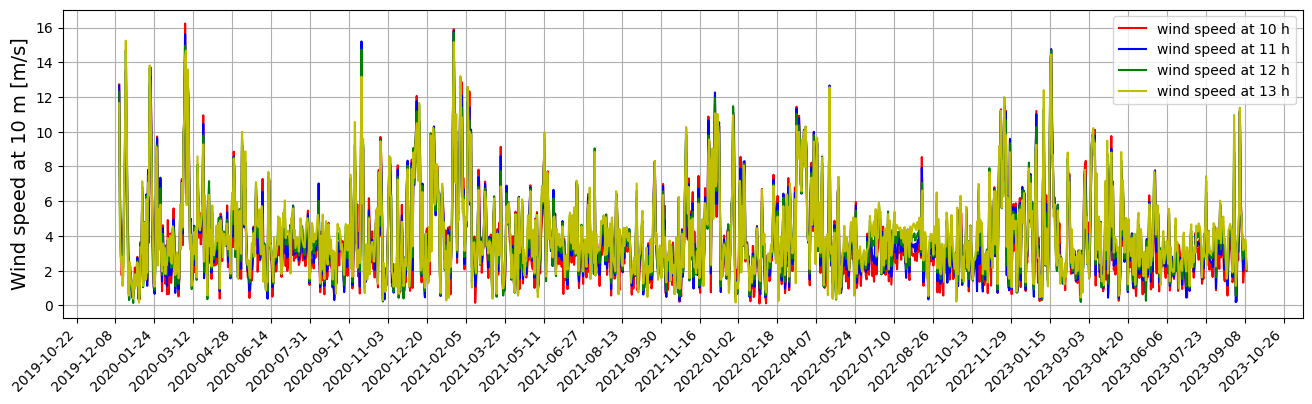

In [309]:
plt.figure(figsize= (16,4))

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.plot(df_10['datetime'],df_10['WS10M'],'r',label='wind speed at 10 h')
plt.plot(df_11['datetime'],df_11['WS10M'],'b',label='wind speed at 11 h')
plt.plot(df_12['datetime'],df_12['WS10M'],'g',label='wind speed at 12 h')
plt.plot(df_13['datetime'],df_13['WS10M'],'y',label='wind speed at 13 h')
plt.legend()
plt.grid(1)

plt.ylabel('Wind speed at 10 m [m/s]',fontsize='14')
plt.xticks(rotation=45, ha='right')
plt.show()

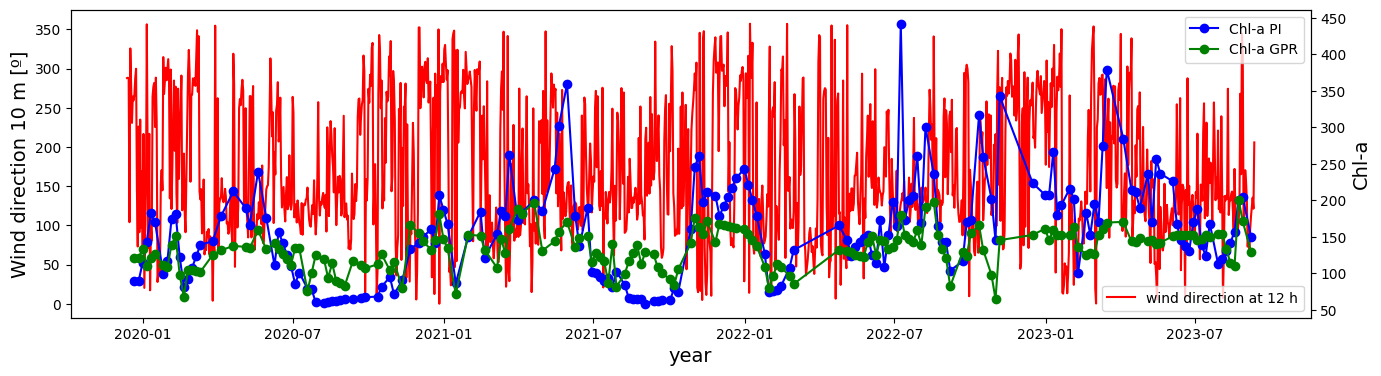

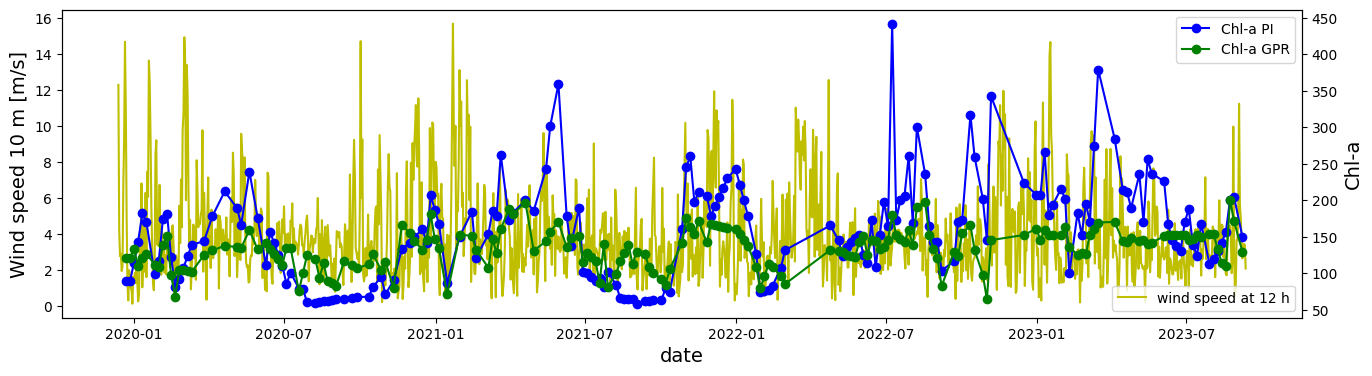

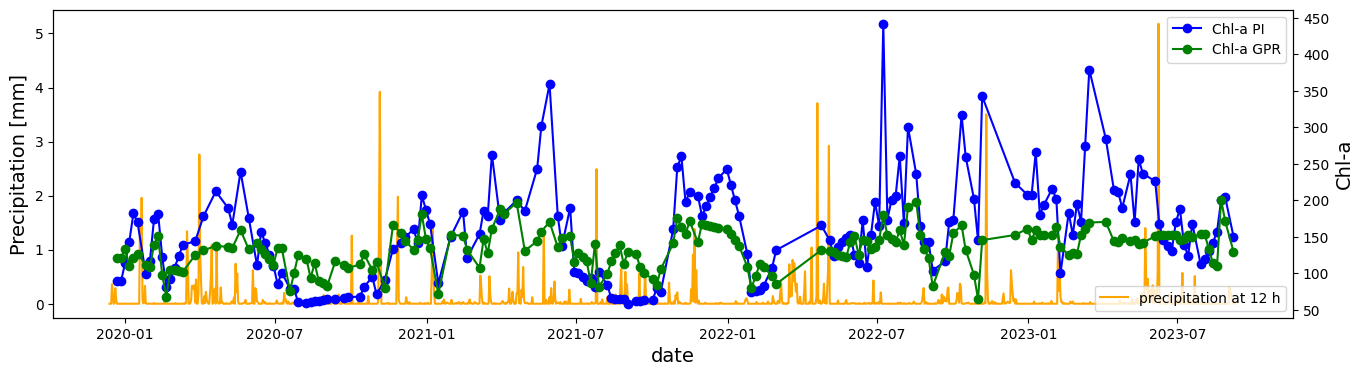

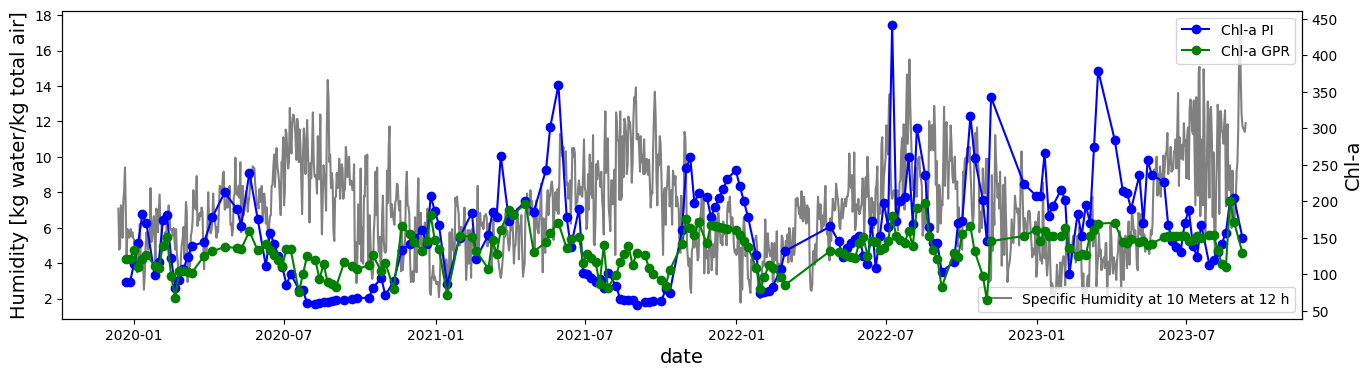

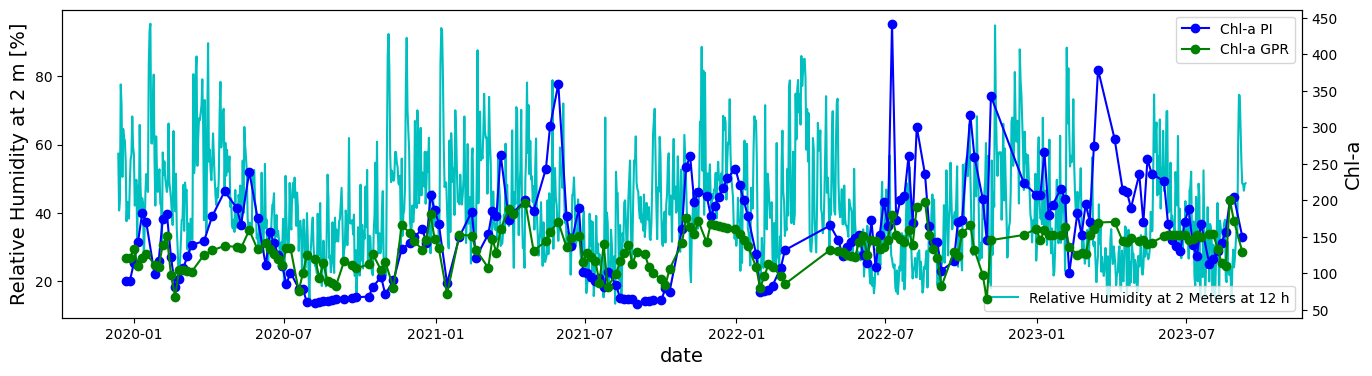

In [310]:
# create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize= (16,4))

# make a plot
#ax.plot(Dates_meteo,meteo_precipitation,
ax.plot(df_12['datetime'],df_12['WD10M'],'r',label='wind direction at 12 h')
#ax.plot(Dates_meteo,meteo_WS10m, color="red", marker="o")

# set x-axis label
ax.set_xlabel("year", fontsize = 14)
# set y-axis label
ax.set_ylabel("Wind direction 10 m [º]",
              color="k",
              fontsize=14)
ax.legend(loc='lower right')
#plt.ylim([0,10])
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Dates_S2,S2_PI_CHL_parcel_mean,color="blue",marker="o",label='Chl-a PI')
ax2.plot(Dates_S2,S2_GPR_CHL_parcel_mean,color="green",marker="o",label='Chl-a GPR')
ax2.set_ylabel("Chl-a",color="k",fontsize=14)
ax2.legend()

fig,ax = plt.subplots(figsize= (16,4))
ax.plot(df_12['datetime'],df_12['WS10M'],'y',label='wind speed at 12 h')
ax.set_xlabel("date", fontsize = 14)
ax.set_ylabel("Wind speed 10 m [m/s]",
              color="k",
              fontsize=14)
ax.legend(loc='lower right')

ax2=ax.twinx()
ax2.plot(Dates_S2,S2_PI_CHL_parcel_mean,color="blue",marker="o",label='Chl-a PI')
ax2.plot(Dates_S2,S2_GPR_CHL_parcel_mean,color="green",marker="o",label='Chl-a GPR')
ax2.set_ylabel("Chl-a",color="k",fontsize=14)
ax2.legend()

fig,ax = plt.subplots(figsize= (16,4))
ax.plot(df_12['datetime'],df_12['PRECTOTCORR'],'orange',label='precipitation at 12 h')
ax.set_xlabel("date", fontsize = 14)
ax.set_ylabel("Precipitation [mm]",
              color="k",
              fontsize=14)
ax.legend(loc='lower right')

ax2=ax.twinx()
ax2.plot(Dates_S2,S2_PI_CHL_parcel_mean,color="blue",marker="o",label='Chl-a PI')
ax2.plot(Dates_S2,S2_GPR_CHL_parcel_mean,color="green",marker="o",label='Chl-a GPR')
ax2.set_ylabel("Chl-a",color="k",fontsize=14)
ax2.legend()

fig,ax = plt.subplots(figsize= (16,4))
ax.plot(df_12['datetime'],df_12['QV10M'],'grey',label='Specific Humidity at 10 Meters at 12 h')
ax.set_xlabel("date", fontsize = 14)
ax.set_ylabel("Humidity [kg water/kg total air]",
              color="k",
              fontsize=14)
ax.legend(loc='lower right')

ax2=ax.twinx()
ax2.plot(Dates_S2,S2_PI_CHL_parcel_mean,color="blue",marker="o",label='Chl-a PI')
ax2.plot(Dates_S2,S2_GPR_CHL_parcel_mean,color="green",marker="o",label='Chl-a GPR')
ax2.set_ylabel("Chl-a",color="k",fontsize=14)
ax2.legend()

fig,ax = plt.subplots(figsize= (16,4))
ax.plot(df_12['datetime'],df_12['RH2M'],'c',label='Relative Humidity at 2 Meters at 12 h')
ax.set_xlabel("date", fontsize = 14)
ax.set_ylabel("Relative Humidity at 2 m [%]",
              color="k",
              fontsize=14)
ax.legend(loc='lower right')

ax2=ax.twinx()
ax2.plot(Dates_S2,S2_PI_CHL_parcel_mean,color="blue",marker="o",label='Chl-a PI')
ax2.plot(Dates_S2,S2_GPR_CHL_parcel_mean,color="green",marker="o",label='Chl-a GPR')
ax2.set_ylabel("Chl-a",color="k",fontsize=14)
ax2.legend()

# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

**Water parameter mapping**

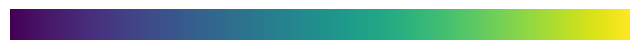

In [191]:
palette_PC = cm.get_palette('viridis', n_class=10)
vis_PC = {'min': 0, 'max': 1200, 'palette': palette_PC}
cm.plot_colormap('viridis', width=8.0, height=0.4, orientation='horizontal')

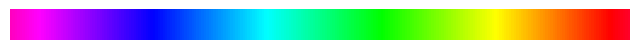

In [192]:
palette_CHL = cm.get_palette('gist_rainbow_r', n_class=10)
vis_CHL = {'min': 0, 'max': 300, 'palette': palette_CHL}
cm.plot_colormap('gist_rainbow_r', width=8.0, height=0.4, orientation='horizontal')

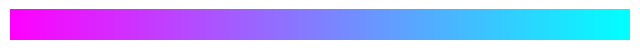

In [193]:
palette_SDD = cm.get_palette('cool_r', n_class=10)
vis_SDD = {'min': 0.25, 'max': 0.45, 'palette': palette_SDD}
cm.plot_colormap('cool_r', width=8.0, height=0.4, orientation='horizontal')

In [194]:
# Map display parameters definition (RGB S2 image)
vizParams = {
  'bands': ['B4', 'B3', 'B2'],
  'min': 0,
  'max': 0.2,
}
#cm.list_colormaps()

In [195]:
u_lat = 39.34
u_lon = -0.35

Map_S2 = geemap.Map(center=(u_lat,u_lon), zoom=13,toolbar_ctrl=True, layer_ctrl=True)
Map_S2.set_plot_options(add_marker_cluster=True)
Map_S2

Map(center=[39.34, -0.35], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(childre…

In [196]:
# S2-based water ecological parameters map display

image_number = 3# select the ordinal number of the image you want to be displayed

# Converting the S2 image collection to an image list for RGB scene display
S2collection_list = S2collection_RGB.toList(S2collection_raw.size());
S2image = ee.Image(S2collection_list.get(image_number));

# S2 RGB image display

Map_S2.addLayer(S2image,vizParams,'S2 RGB composite',True)

# Single variable display

S2_GPR_CHL_image = S2_GPR_CHL_collection.toBands()
S2_GPR_PC_image = S2_GPR_PC_collection.toBands()
S2_GPR_SDD_image = S2_GPR_SDD_collection.toBands()
S2_PI_CHL_image = S2_PI_CHL_collection.toBands()
S2_PI_PC_image = S2_PI_PC_collection.toBands()
S2_PI_SDD_image = S2_PI_SDD_collection.toBands()

Map_S2.addLayer(S2_GPR_CHL_image.select(image_number),vis_CHL, 'S2 GPR CHL')
#Map_S2.addLayer(S2_GPR_PC_image.select(image_number),vis_PC, 'S2 GPR PC')
#Map_S2.addLayer(S2_GPR_SDD_image.select(image_number),vis_SDD, 'S2 GPR SDD')
Map_S2.addLayer(S2_PI_CHL_image.select(image_number),vis_CHL, 'S2 PI CHL')
#Map_S2.addLayer(S2_PI_PC_image.select(image_number),vis_PC, 'S2 PI PC')
#Map_S2.addLayer(S2_PI_SDD_image.select(image_number),vis_SDD, 'S2 PI SDD')

# Variables collection display (mean, max or min).

#Map_S2.addLayer(S2_GPR_CHL_collection.mean(),vis_CHL, 'S2 GPR CHL collection')
#Map_S2.addLayer(S2_GPR_PC_collection.mean(),vis_PC, 'S2 GPR PC collection')
#Map_S2.addLayer(S2_GPR_SDD_collection.mean(),vis_SDD, 'S2 GPR SDD collection')
#Map_S2.addLayer(S2_PI_CHL_collection.mean(),vis_CHL, 'S2 PI CHL collection')
#Map_S2.addLayer(S2_PI_PC_collection.mean(),vis_PC, 'S2 PI PC collection')
#Map_S2.addLayer(S2_PI_SDD_collection.mean(),vis_SDD, 'S2 PI SDD collection')

# On-screen display of variable time sliders

#Map_S2.add_time_slider(S2_GPR_CHL_collection ,vis_CHL, region=roi_Albufera,layer_name='S2 GPR CHL time-series',labels=labels_S2, time_interval=1)
#Map_S2.add_time_slider(S2_GPR_PC_collection ,vis_PC, region=roi_Albufera,layer_name='S2 GPR PC time-series',labels=labels_S2, time_interval=1)
#Map_S2.add_time_slider(S2_GPR_SDD_collection ,vis_SDD, region=roi_Albufera,layer_name='S2 GPR SDD time-series',labels=labels_S2, time_interval=1)
#Map_S2.add_time_slider(S2_PI_CHL_collection ,vis_CHL, region=roi_Albufera,layer_name='S2 PI CHL time-series',labels=labels_S2, time_interval=1)
#Map_S2.add_time_slider(S2_PI_PC_collection ,vis_PC, region=roi_Albufera,layer_name='S2 PI PC time-series',labels=labels_S2, time_interval=1)
#Map_S2.add_time_slider(S2_PI_SDD_collection ,vis_SDD, region=roi_Albufera,layer_name='S2 PI SDD time-series',labels=labels_S2, time_interval=1)

# On-screen display of vectorial layers

Map_S2.addLayer(roi_Albufera, {},'Albufera ROI',opacity = 0.3)
#Map_S2.addLayer(roi, {},'ROI')

# On-screen display of color bars

Map_S2.add_colorbar(vis_CHL, label="CHL ($\mu$g $L^{-1}$)", orientation="horizontal", layer_name="barato color bar")
#Map_S2.add_colorbar(vis_PC, label="PC ($\mu$g $L^{-1}$)", orientation="horizontal", layer_name="PC color bar")
#Map_S2.add_colorbar(vis_SDD, label="SDD (m)", orientation="horizontal", layer_name="SDD color bar")

Exporting geemap as TIFF file

In [ ]:
from datetime import datetime
# datetime object containing current date and time
now = datetime.now()
dt_string = now.strftime("%d-%m-%Y_%H:%M:%S")

#Exporting S2 RGB image for the selected region of interest
geemap.ee_export_image_to_drive(
    S2image, description='S2_RGB_Albufera_'+Dates_S2[image_number].strftime("%d-%m-%Y"), folder='RESSBIO_'+'RGB_'+dt_string, region=roi_Albufera.geometry(), scale=10
)
#Exporting S2 CHL map for the selected region of interest
geemap.ee_export_image_to_drive(
     S2_GPR_CHL_image.select(image_number), description='S2_GPR_CHL_Albufera_'+Dates_S2[image_number].strftime("%d-%m-%Y"), folder='RESSBIO_'+'CHL_'+dt_string, region=roi_Albufera.geometry(), scale=10
)
#Exporting S2 PC map for the selected region of interest
geemap.ee_export_image_to_drive(
     S2_GPR_PC_image.select(image_number), description='S2_GPR_PC_Albufera_'+Dates_S2[image_number].strftime("%d-%m-%Y"), folder='RESSBIO_'+'PC_'+dt_string, region=roi_Albufera.geometry(), scale=10
)
#Exporting S2 CHL map for the selected region of interest
geemap.ee_export_image_to_drive(
     S2_GPR_SDD_image.select(image_number), description='S2_GPR_SDD_Albufera_'+Dates_S2[image_number].strftime("%d-%m-%Y"), folder='RESSBIO_'+'SDD_'+dt_string, region=roi_Albufera.geometry(), scale=10
)

Exporting water parameter image collection

In [ ]:
from datetime import datetime
# datetime object containing current date and time
now = datetime.now()
dt_string = now.strftime("%d-%m-%Y_%H:%M:%S")
geemap.ee_export_image_to_drive(
     S2_GPR_CHL_image, description='S2_GPR_CHL_Albufera_collection', folder='RESSBIO collections_'+dt_string, region=roi_Albufera.geometry(), scale=10
)

In [ ]:
geemap.ee_export_image_to_drive(
     S2_PI_CHL_image, description='S2_PI_CHL_Albufera_collection', folder='RESSBIO collections_'+dt_string, region=roi_Albufera.geometry(), scale=10
)

In [ ]:
geemap.ee_export_image_to_drive(
     S2_GPR_PC_image, description='S2_GPR_PC_Albufera_collection', folder='RESSBIO collections_'+dt_string, region=roi_Albufera.geometry(), scale=10
)
geemap.ee_export_image_to_drive(
     S2_PI_PC_image, description='S2_PI_PC_Albufera_collection', folder='RESSBIO collections_'+dt_string, region=roi_Albufera.geometry(), scale=10
)

In [ ]:
geemap.ee_export_image_to_drive(
     S2_GPR_SDD_image, description='S2_GPR_SDD_Albufera_collection', folder='RESSBIO collections_'+dt_string, region=roi_Albufera.geometry(), scale=10
)
geemap.ee_export_image_to_drive(
     S2_PI_SDD_image, description='S2_PI_SDD_Albufera_collection', folder='RESSBIO collections_'+dt_string, region=roi_Albufera.geometry(), scale=10
)

Water ecological variables mean (Whole Albufera)

In [197]:
# Chart *series*
test_site = roi_Albufera
chart_ts_GPR_CHL = ui.chart.Image.series(**{
    'imageCollection': S2_GPR_CHL_collection,
    'region': test_site,
    'scale': 20,
    'reducer': ee.Reducer.mean(),
    'xProperty': 'system:time_start',
    'system':'index',
    'bands': ['Chl'],
    'labels': ['Date','Chl-a']
})

chart_ts_GPR_CHL.renderWidget()  # for Jupyter Notebook or Lab

HTML(value='<embed src=data:image/svg+xml;charset=utf-8;base64,PD94bWwgdmVyc2lvbj0nMS4wJyBlbmNvZGluZz0ndXRmLTg…

In [198]:
chart_ts_PI_CHL = ui.chart.Image.series(**{
    'imageCollection': S2_PI_CHL_collection,
    'region': test_site,
    'scale': 20,
    'reducer': ee.Reducer.mean(),
    'xProperty': 'system:time_start',
    'bands': ['chlro'],
    'labels': ['Date','Chl-a']
})

chart_ts_PI_CHL.renderWidget()  # for Jupyter Notebook or Lab

HTML(value='<embed src=data:image/svg+xml;charset=utf-8;base64,PD94bWwgdmVyc2lvbj0nMS4wJyBlbmNvZGluZz0ndXRmLTg…

In [199]:
# Chart *series*
chart_ts_GPR_PC = ui.chart.Image.series(**{
    'imageCollection': S2_GPR_PC_collection,
    'region': test_site,
    'scale': 20,
    'reducer': ee.Reducer.mean(),
    'xProperty': 'system:time_start',
    'system':'index',
    'bands': ['PC'],
    'labels': ['Date','PC']
})

chart_ts_GPR_PC.renderWidget()  # for Jupyter Notebook or Lab

HTML(value='<embed src=data:image/svg+xml;charset=utf-8;base64,PD94bWwgdmVyc2lvbj0nMS4wJyBlbmNvZGluZz0ndXRmLTg…

In [200]:
chart_ts_PI_PC = ui.chart.Image.series(**{
    'imageCollection': S2_PI_PC_collection,
    'region': test_site,
    'scale': 20,
    'reducer': ee.Reducer.mean(),
    'bands': ['fico'],
    'labels': ['Date','PC']
})

chart_ts_PI_PC.renderWidget()  # for Jupyter Notebook or Lab

HTML(value='<embed src=data:image/svg+xml;charset=utf-8;base64,PD94bWwgdmVyc2lvbj0nMS4wJyBlbmNvZGluZz0ndXRmLTg…

In [201]:
# Chart *series*
chart_ts_GPR_SDD = ui.chart.Image.series(**{
    'imageCollection': S2_GPR_SDD_collection,
    'region': test_site,
    'scale': 300,
    'reducer': ee.Reducer.mean(),
    'xProperty': 'system:time_start',
    'bands': ['ZSD'],
    'labels': ['Date','SDD']
})

chart_ts_GPR_SDD.renderWidget()  # for Jupyter Notebook or Lab

HTML(value='<embed src=data:image/svg+xml;charset=utf-8;base64,PD94bWwgdmVyc2lvbj0nMS4wJyBlbmNvZGluZz0ndXRmLTg…

In [202]:
# Chart *series*
chart_ts_PI_SDD = ui.chart.Image.series(**{
    'imageCollection': S2_PI_SDD_collection,
    'region': test_site,
    'scale': 300,
    'reducer': ee.Reducer.mean(),
    'xProperty': 'system:time_start',
    'bands': ['Secchi'],
    'labels': ['Date','SDD']
})

chart_ts_PI_SDD.renderWidget()  # for Jupyter Notebook or Lab

HTML(value='<embed src=data:image/svg+xml;charset=utf-8;base64,PD94bWwgdmVyc2lvbj0nMS4wJyBlbmNvZGluZz0ndXRmLTg…

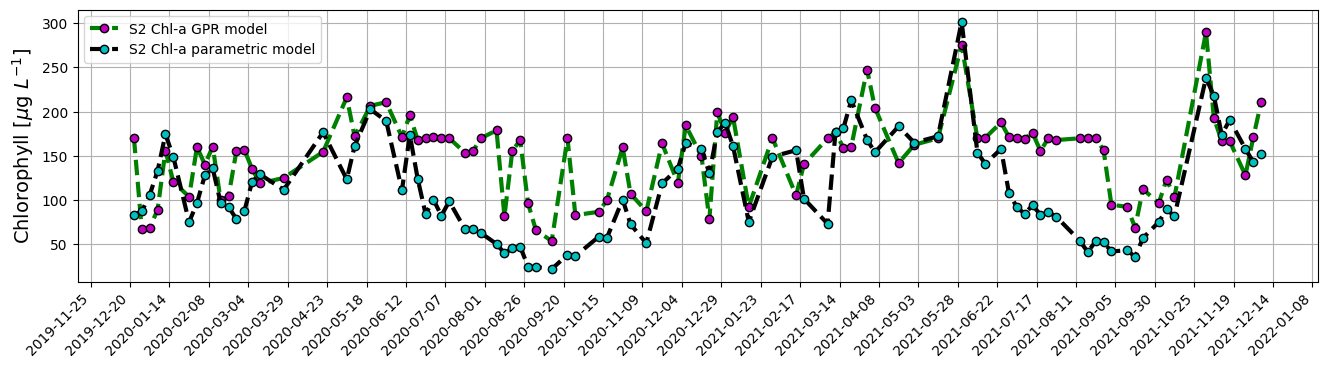

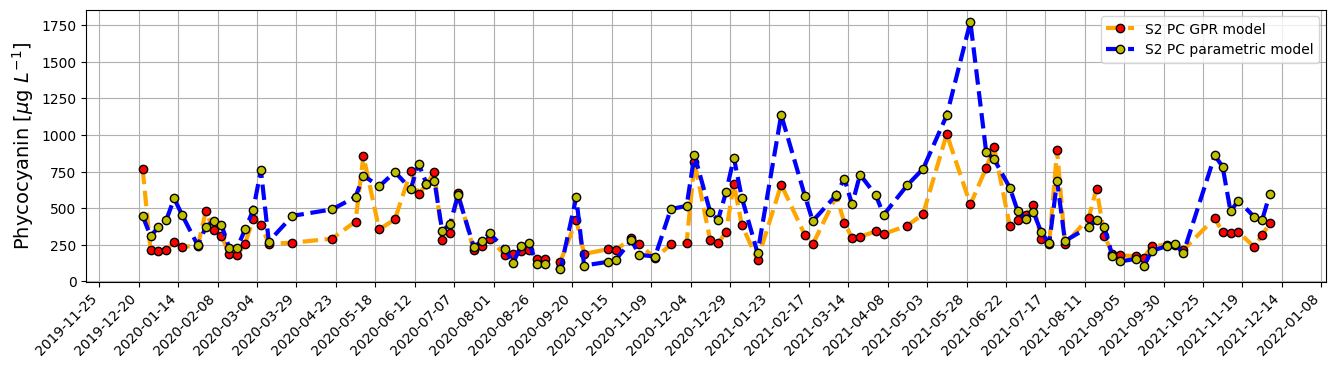

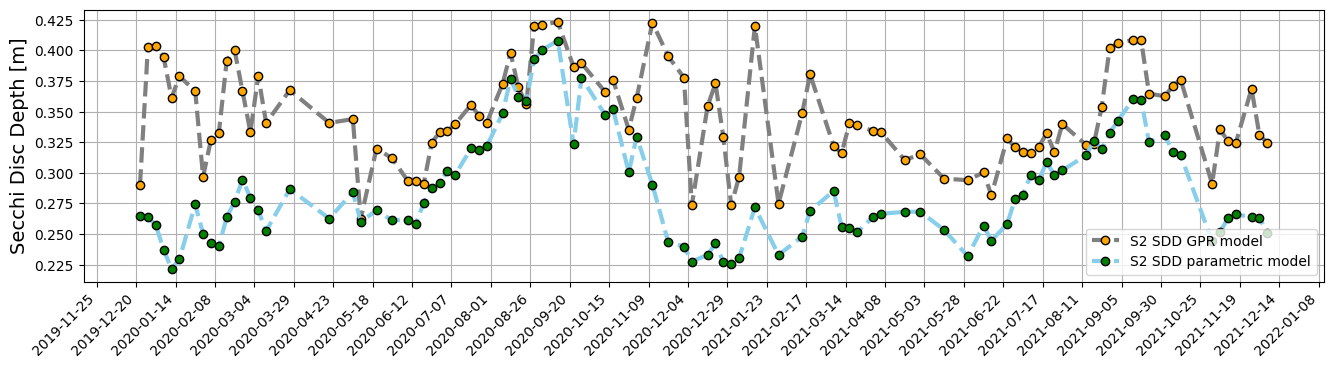

In [203]:
# Water ecological variables time series plotting - Albufera mask

df_GPR_CHL = chart_ts_GPR_CHL.dataframe
df_PI_CHL = chart_ts_PI_CHL.dataframe

df_GPR_PC = chart_ts_GPR_PC.dataframe
df_PI_PC = chart_ts_PI_PC.dataframe

df_GPR_SDD = chart_ts_GPR_SDD.dataframe
df_PI_SDD = chart_ts_PI_SDD.dataframe

plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
df_GPR_CHL.plot(y='Chl', kind='line',figsize=(16,4),color='green', ax=ax,linestyle="--",marker="o",markerfacecolor='m',markeredgecolor='k',markersize=6,lw=3,label='S2 Chl-a GPR model');
df_PI_CHL.plot(y='chlro', kind='line',figsize=(16,4),lw=3,color='black', ax=ax,linestyle="--",marker="o",markerfacecolor='c',markeredgecolor='k',markersize=6,label='S2 Chl-a parametric model');
plt.legend()
plt.ylabel('Chlorophyll [$\mu$g $L^{-1}$]',fontsize='14')
plt.grid(1)
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
df_GPR_PC.plot(y='PC', kind='line',figsize=(16,4),color='orange', ax=ax,linestyle="--",marker="o",markerfacecolor='r',markeredgecolor='k',markersize=6,lw=3,label='S2 PC GPR model');
df_PI_PC.plot(y='fico', kind='line',figsize=(16,4),lw=3,color='blue', ax=ax,linestyle="--",marker="o",markerfacecolor='y',markeredgecolor='k',markersize=6,label='S2 PC parametric model');
plt.legend()
plt.ylabel('Phycocyanin [$\mu$g $L^{-1}$]',fontsize='14')
plt.grid(1)
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
df_GPR_SDD.plot(y='ZSD', kind='line',figsize=(16,4),color='grey', ax=ax,linestyle="--",marker="o",markerfacecolor='orange',markeredgecolor='k',markersize=6,lw=3,label='S2 SDD GPR model');
df_PI_SDD.plot(y='Secchi', kind='line',figsize=(16,4),lw=3,color='skyblue', ax=ax,linestyle="--",marker="o",markerfacecolor='g',markeredgecolor='k',markersize=6,label='S2 SDD parametric model');
plt.legend()
plt.ylabel('Secchi Disc Depth [m]',fontsize='14')
plt.grid(1)
plt.xticks(rotation=45, ha='right')
plt.show()

Exporting water parameters time series data

In [ ]:
from datetime import datetime
# datetime object containing current date and time
now = datetime.now()
dt_string = now.strftime("%d-%m-%Y_%H:%M:%S")

Dates_S2_ID = np.arange(1,S2_GPR_CHL_image_nparray.shape[2]+1)
df_dates_S2 = pd.DataFrame(Dates_S2, columns=['Dates_S2'])
df_ID = pd.DataFrame(Dates_S2_ID, columns=['ID'])

# concatenating df_dates_S2 and df_ID along columns
df_dates_S2_concatenated = pd.concat([df_ID, df_dates_S2], axis=1)
df_concatenated_time_series = pd.concat([df_GPR_CHL, df_GPR_PC, df_GPR_SDD, df_PI_CHL, df_PI_PC, df_PI_SDD], axis=1)

df_concatenated_time_series.reset_index(inplace=True, drop=True)
df_concatenated_dates_time_series = pd.concat([df_dates_S2_concatenated, df_concatenated_time_series], axis=1)

df_concatenated_dates_time_series.rename(columns = {'Chl':'CHL_GPR', 'PC':'PC_GPR','ZSD':'SDD_GPR','chlro':'CHL_PI','fico':'PC_PI','Secchi':'SDD_PI'}, inplace = True)
df_concatenated_dates_time_series.to_csv('/content/drive/MyDrive/RESSBIO water parameters time series ' + dt_string + '.csv', index=False,header=True)

display(df_concatenated_dates_time_series)

#specify path for export
path = r'/content/drive/MyDrive/RESSBIO water parameters time series ' + dt_string + '.txt'

#export DataFrame to text file (keep header row and index column)
with open(path, 'a') as f:
    df_string = df_concatenated_dates_time_series.to_string()
    f.write(df_string)

,ID,Dates_S2,CHL_GPR,PC_GPR,SDD_GPR,CHL_PI,PC_PI,SDD_PI
0,1,2017-04-06,79.623224,162.645121,0.384195,43.817785,84.769270,0.354375
1,2,2017-04-26,81.690741,396.417783,0.334699,75.995319,408.333084,0.305062
2,3,2017-05-06,114.855674,678.424714,0.266307,122.817137,409.258158,0.284825
3,4,2017-05-26,134.909014,964.014214,0.237535,260.015077,1261.448823,0.261994
4,5,2017-06-05,112.050244,775.809247,0.268135,160.911480,731.928606,0.267571
...,...,...,...,...,...,...,...,...
230,231,2023-05-15,123.169649,1123.152403,0.237497,246.923176,1429.417246,0.250816
231,232,2023-05-20,121.611808,1065.115739,0.241940,231.617098,1404.470141,0.254579
232,233,2023-06-04,127.261436,934.075490,0.237569,214.738358,1204.446878,0.252635
233,234,2023-06-09,108.194672,503.316908,0.269970,168.093712,1200.943199,0.255385


## Macrophytes detection

In [ ]:
# Add NDWI_mask band to an image collection
NDWI_collection = S2collection_raw.map(addNDWI).select('NDWI').map(clipcol)
S2_NDWI_mask_image = NDWI_collection.toBands() # Use this option if you want to unmask the land surface surrounding the lagoon
#S2_NDWI_mask_image = NDWI_collection.toBands().unmask(0);

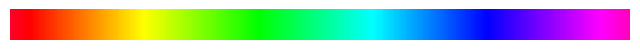

In [ ]:
palette_NDWI = cm.get_palette('gist_rainbow', n_class=10)
vis_NDWI = {'min': -1, 'max': 0, 'palette': palette_NDWI}
cm.plot_colormap('gist_rainbow', width=8.0, height=0.4, orientation='horizontal')

In [ ]:
u_lat = 39.34
u_lon = -0.35

Map_S2_NDWI = geemap.Map()
Map_S2_NDWI = geemap.Map(center=(u_lat,u_lon), zoom=13)
Map_S2_NDWI.set_plot_options(add_marker_cluster=True)
Map_S2_NDWI

Map(center=[39.34, -0.35], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(childre…

In [ ]:
Map_S2_NDWI.addLayer(roi_Albufera, {},'Albufera ROI',opacity = 0.7)
Map_S2_NDWI.addLayer(S2image, vizParams,'S2 RGB composite')
#Map_S2_2.add_time_slider(NDWI_collection ,vis_NDWI, region=roi_Albufera,layer_name='S2 NDWI Time-series',labels=labels_S2, time_interval=1)
Map_S2_NDWI.addLayer(S2_NDWI_mask_image.select(1),vis_NDWI,'S2 NDWI')
Map_S2_NDWI.add_colorbar(vis_NDWI, label="NDWI", orientation="horizontal", layer_name="NDWI")